# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [47]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [16]:
df["YEAR"]

0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [15]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

33

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
ohio_scores = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"]
michigan_scores = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"]
print(michigan_scores.mean(), ohio_scores.mean())

##Ohio has the higher average outcome score

SyntaxError: invalid syntax (2736635104.py, line 5)

Find the average for your outcome score across all states in 2019

In [48]:
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

sum2019 = df.loc[df["YEAR"] == 2019, "AVG_MATH_8_SCORE"].sum()
count2019 = df.loc[df["YEAR"] == 2019, "AVG_MATH_8_SCORE"].count()
avg2019 = [sum2019 / count2019]

print("AVG SCORE IN 2019:", avg2019)

AVG SCORE IN 2019: [281.2641509433962]


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [46]:
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [49]:
df.dropna(subset=["STATE"], inplace=True)
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

**Comparing the correlation between home state and average year 8 math scores**

**Visualization 2**

<AxesSubplot: title={'center': 'State vs Avg_math_8_score'}, xlabel='STATE', ylabel='AVG_MATH_8_SCORE'>

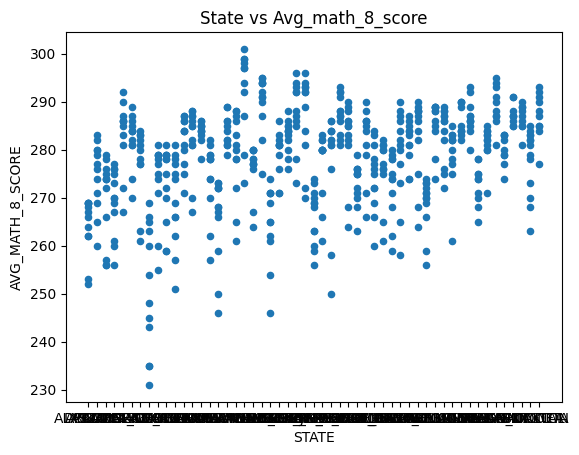

In [50]:
df.plot.scatter(x="STATE", y="AVG_MATH_8_SCORE", title="State vs Avg_math_8_score")

**<Scatterplot comparing state versus average year 8 math score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [51]:
from sklearn.linear_model import train_test_split

In [127]:
X = df["FEDERAL_REVENUE"].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [129]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [130]:
# create your model here
model = LinearRegression()

In [132]:
#X = df["FEDERAL_REVENUE"].dropna()
#y = df.loc[X.index]["AVG_MATH_8_SCORE"]
#df.dropna()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.intercept)
print(model.coef)

ValueError: Expected 2D array, got 1D array instead:
array=[ 526411.  787269. 1377661.  113501.  482904.  836137.  130928. 1164688.
  193393.  383169.  392837.   91986.  170377.  174096.  768972.  534510.
 1051973.  273946.  192039.  646215.  184718.  202977.  929878.  827026.
  296222.  656298. 1475463.  106513.  163516.  151096. 1721213.  707522.
  228336. 1835598.  386553.  680718.  472604. 2591430.  826830.  712487.
 1238259.  194731. 7200298.  126023. 1413888.  392009. 1419644. 2267161.
  797717.  715944.  447012. 1255964.  150165.  263030. 1589570.  106823.
  571969.  665924.   43545.  395630.  125956.  249903.  245063.  304688.
  379947.  368830.  148482.  390585.  639308. 1042200.  574090. 1122775.
  471682.  218777.  171819.  344382.  234321. 1229248.  778939. 3335657.
   81655. 7148863.  499789. 2262192.  431142.   51476.  329159.  186844.
 1024389. 1283052.  210593.  344111. 1184934.  206853. 1172030.  178571.
  192182.  529037.  719997.  214980.  814137.  472246.  277849. 1357006.
  842906.  129874. 1006465.  444466.  572096.  529854.  991769.  308571.
  890144.  661677.  111051.  154955. 9745250.  190631. 1938590.   31020.
  612100. 3269310.  254735.  563974.  165167.  702469.  101294. 1116670.
  310778.  217723. 1283994.  491873.  201889. 4913841.  125665.  894168.
  105333.  343915.  251421.  259423.  362959.  948600.  191839.  356865.
  197651.   73160.  292602.  225861. 1344755.  401558. 1044140.  758650.
  636436.  867735. 3346509. 1805878.  537917.  160294.  805633. 1178356.
 2072470. 2525528. 3360082.  102453. 1077070.  189502.  689072.  672366.
  164905.  734602.  155505.  114697.  565072.  715254.  210082. 1197383.
  575703.   69138.  500782. 5795655.  519973. 1160185. 2869847.  480898.
   31714. 1531263.  109898.  730811.  980013. 2311235.  163890.  148498.
 1821479.  437898.  420820.  267470.  483689.   85423.  534619.  304177.
  677570. 2049113.  311152. 1497262. 1857885.   95016. 1181681.  162530.
 1235580. 1618724.  795238.  678448.   96940.  289290.  710741. 7836263.
  546297.  535223. 4423644.  363930. 1375318.  510256.  796450.  530014.
  444073.  814385.  297732. 3371827.  198101.  740579.  109011.  409774.
  458457. 1956803.  567704. 3197833.  407432.  818054.  969288.  409021.
 2533882. 2094714. 7556365.  425978.  463746.  848963. 1811141. 1093834.
  313971.  221530. 1108879.  698716. 9990221.  389145.  106484. 1579889.
  937945.  844640. 2694566. 1234006.  211627.  658139.   79956.  282270.
 1582706. 1245814.  259390.  708922.  108333.  183883.  326400.  503734.
  320938. 1002909. 1862627.   75856.  888996.  475273. 1014556.  268568.
 1367629.  416063. 3156023.  811739. 1676820.  176738.  577106.  130117.
 2489027.  447002.  146366.  351001.  843432.  400219.  796156.  109682.
  870374.  298196.  398701. 1636324.  256696.  378810.  848637.  134700.
 1097349.  184825.  145957.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

802     284.0
705     271.0
900     284.0
1121    288.0
585     261.0
        ...  
1006    283.0
773     248.0
596     282.0
416     235.0
702     272.0
Name: AVG_MATH_8_SCORE, Length: 307, dtype: float64

In [108]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
plt.ylabel()= 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My linear regression model, unfortunately, did not end up running.  I enjoyed tutorials 0 and 1 in learning how to interpret data and compare columns for cross-column analysis.  It was also interesting to learn the exact coding methology to compare two different categories, as done with the Michigan versus Ohio average outcome scores.  My favorite part of this experience was creating graphs in order to compare data.  I am personally a visual learner, so it was interesting to see a visual representation of the data correlation.  While I am somewhat new to coding and python, I am looking forward to launching a successful and running model fit of linear regression!